# Import Libraries

In [31]:
import os

import numpy as np

import gym
import minerl

from tqdm.notebook import tqdm
from colabgymrender.recorder import Recorder
from pyvirtualdisplay import Display
from pyvirtualdisplay import Display
import logging
import os, sys, time 
logging.disable(logging.ERROR) # reduce clutter, remove if something doesn't work to see the error logs.
from rich import print
from rich import print
from rich.pretty import Pretty
from rich.panel import Panel
import matplotlib.pylab as plt
pretty = Pretty(locals())
panel = Panel(pretty)
print(panel)

np.__version__  # '1.21.6' => that this is reading from our ~/mine_env directory

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│ {                                                                                         │
│     '__name__': '__main__',                                                               │
│     '__doc__': 'Automatically created module for IPython interactive environment',        │
│     '__package__': None,                                                                  │
│     '__loader__': None,                                                                   │
│     '__spec__': None,                                                                     │
│     '__builtin__': <module 'builtins' (built-in)>,                                        │
│     '__builtins__': <module 'builtins' (built-in)>,                                       │
│     '_ih': [                                                                              │
│         '',                                                                               │
│         "import os\n\nimport numpy as np\n\nimport gym\nimport minerl\n\nfrom             │
│ tqdm.notebook import tqdm\nfrom colabgymrender.recorder import Recorder\nfrom             │
│ pyvirtualdisplay import Display\nfrom pyvirtualdisplay import Display\nimport             │
│ logging\nlogging.disable(logging.ERROR) # reduce clutter, remove if something doesn't     │
│ work to see the error logs.\n\nnp.__version__  # '1.21.6' => that this is reading from    │
│ our ~/mine_env directory",                                                                │
│         'env = gym.mak("findcave2022")',                                                  │
│         'env = gym.make("findcave2022")',                                                 │
│         'env = gym.make("/home/ramiismael/code/basalt_2022/findcave2022")',               │
│         'env = gym.make("MineRLBasaltFindCave-v0")',                                      │
│         "import os\n\nimport numpy as np\n\nimport gym\nimport minerl\n\nfrom             │
│ tqdm.notebook import tqdm\nfrom colabgymrender.recorder import Recorder\nfrom             │
│ pyvirtualdisplay import Display\nfrom pyvirtualdisplay import Display\nimport             │
│ logging\nlogging.disable(logging.ERROR) # reduce clutter, remove if something doesn't     │
│ work to see the error logs.\nfrom rich import print\n\nnp.__version__  # '1.21.6' => that │
│ this is reading from our ~/mine_env directory",                                           │
│         'env = gym.make("MineRLBasaltFindCave-v0")',                                      │
│         'env',                                                                            │
│         'print(env.observation_space)',                                                   │
│         "import os\n\nimport numpy as np\n\nimport gym\nimport minerl\n\nfrom             │
│ tqdm.notebook import tqdm\nfrom colabgymrender.recorder import Recorder\nfrom             │
│ pyvirtualdisplay import Display\nfrom pyvirtualdisplay import Display\nimport             │
│ logging\nlogging.disable(logging.ERROR) # reduce clutter, remove if something doesn't     │
│ work to see the error logs.\nfrom rich import print\nfrom rich import print\nfrom         │
│ rich.pretty import Pretty\nfrom rich.panel import Panel\n\npretty =                       │
│ Pretty(locals())\npanel = Panel(pretty)\nprint(panel)\n\nnp.__version__  # '1.21.6' =>    │
│ that this is reading from our ~/mine_env directory",                                      │
│         'env = gym.make("MineRLBasaltFindCave-v0")',                                      │
│         'print(env.observation_space)',                                                   │
│         'print(env.observation_space)',                                                   │
│         'print(env.action_space)',                                                        │
│         'print(env.action_space["attack"])',      

'1.21.6'

# Download the Gym

In [32]:
env = gym.make("MineRLBasaltFindCave-v0")

# 

# Look at the action I can Take in the Gym 

In [33]:
## print the action you can the in the environment
print(env.action_space)
print(type(env.action_space))
print(env.action_space.sample())
print(env.action_space.sample().keys())

Dict(attack:Discrete(2), back:Discrete(2), camera:Box(low=-180.0, high=180.0, shape=(2,)), eq
uip:Enum(air,bucket,carrot,cobblestone,fence,fence_gate,none,other,snowball,stone_pickaxe,sto
ne_shovel,water_bucket,wheat,wheat_seeds), forward:Discrete(2), jump:Discrete(2), 
left:Discrete(2), right:Discrete(2), sneak:Discrete(2), sprint:Discrete(2), use:Discrete(2))

<class 'minerl.herobraine.hero.spaces.Dict'>

OrderedDict([('attack', array(0)), ('back', array(0)), ('camera', array([-10.837165, 
104.35591 ], dtype=float32)), ('equip', 'fence_gate'), ('forward', array(0)), ('jump', 
array(0)), ('left', array(1)), ('right', array(1)), ('sneak', array(0)), ('sprint', 
array(1)), ('use', array(1))])

odict_keys(['attack', 'back', 'camera', 'equip', 'forward', 'jump', 'left', 'right', 'sneak',
'sprint', 'use'])

In [34]:
print(env.observation_space)

Dict(equipped_items:Dict(mainhand:Dict(damage:Box(low=-1, high=1562, shape=()), 
maxDamage:Box(low=-1, high=1562, shape=()), type:Enum(air,bucket,carrot,cobblestone,fence,fen
ce_gate,none,other,snowball,stone_pickaxe,stone_shovel,water_bucket,wheat,wheat_seeds))), 
inventory:Dict(bucket:Box(low=0, high=2304, shape=()), carrot:Box(low=0, high=2304, 
shape=()), cobblestone:Box(low=0, high=2304, shape=()), fence:Box(low=0, high=2304, 
shape=()), fence_gate:Box(low=0, high=2304, shape=()), snowball:Box(low=0, high=2304, 
shape=()), stone_pickaxe:Box(low=0, high=2304, shape=()), stone_shovel:Box(low=0, high=2304, 
shape=()), water_bucket:Box(low=0, high=2304, shape=()), wheat:Box(low=0, high=2304, 
shape=()), wheat_seeds:Box(low=0, high=2304, shape=())), pov:Box(low=0, high=255, shape=(64, 
64, 3)))

/home/ramiismael/miniconda3/envs/mine_rl/lib/python3.7/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/home/ramiismael/miniconda3/envs/mine_rl/lib/python3.7/runpy.py:125: RuntimeWarning: 'minerl.utils.process_watcher' found in sys.modules after import of package 'minerl.utils', but prior to execution of 'minerl.utils.process_watcher'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


0.33sec for env.step

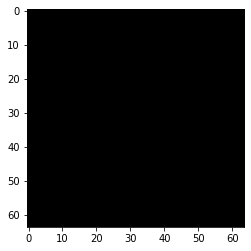

0.31sec for env.step

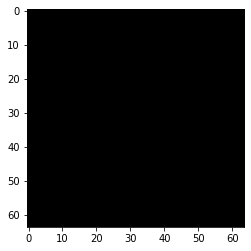

0.33sec for env.step

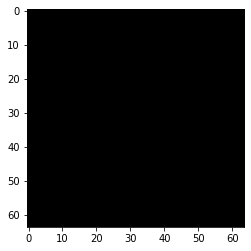

0.42sec for env.step

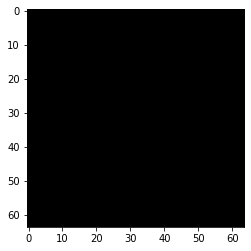

0.29sec for env.step

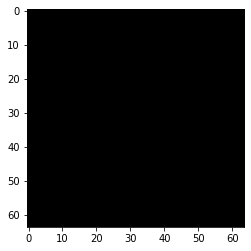

0.50sec for env.step

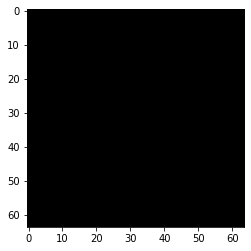

0.56sec for env.step

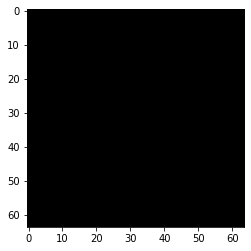

0.31sec for env.step

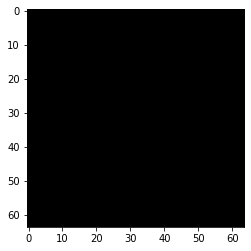

0.37sec for env.step

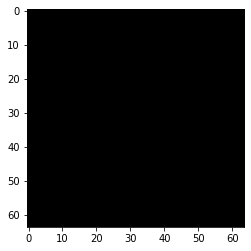

0.17sec for env.step

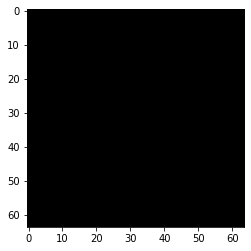

0.25sec for env.step

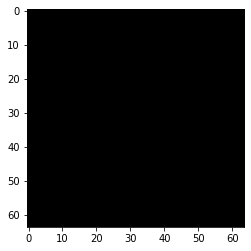

0.21sec for env.step

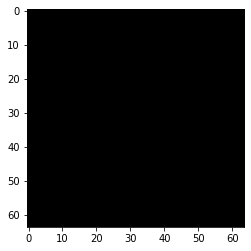

0.20sec for env.step

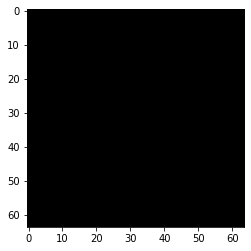

'132.18sec for whole spin'

In [35]:
# Now that Steve has been spawned, do some actions...
t0=time.time()
obs = env.reset()  # First obs is thrown away...
done, iter = False, 0
while not done:
    ac = env.action_space.noop()
    # Spin around to see what is around us
    ac["camera"] = [0, +30]  # (pitch, yaw) deltas in degrees : +30 => turn to right

    t1=time.time()
    obs, reward, done, info = env.step(ac)
    #print(obs, reward, info)  # NB: Yikes : obs is only the image!
    #  obs = Dict(pov:Box(low=0, high=255, shape=(360, 640, 3)))
    #print(pov.shape) # (360, 640, 3)  Image spec agrees with docs!
    print(f"{(time.time()-t1):.2f}sec for env.step")  # Approx 0.25sec per step

    pov = obs["pov"]

    #env.render()  # This does an internal cv2.imshow that colab rejects
    #cv2_imshow(pov[:, :, ::-1])
    #cv2.waitKey(1)

    plt.imshow(pov)
    plt.show()
    iter +=1
    if iter>12: done=True

f"{(time.time()-t0):.2f}sec for whole spin"